# Table of Contents
- [Data Overview]Data Overview(#Data-Overview)
- [Dataset basic info](#Dataset basic info)

# Table of Contents
- [Data Overview](#data-overview)
- [Correlation Matrix](#correlation-matrix)
- [Insights & Analysis](#insights--analysis)


In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc





## Data-Overview
- 27901 samples/rows
- Columns
    - ID: Unique identifier for each student.
    - Age: Age of the student.
    - Gender: Gender (e.g., Male, Female).
    - City: Geographic region
    - CGPA: Grade Point Average or other academic scores.
    - Sleep Duration: Average daily sleep duration.
    - Profession:
    - Work Pressure:
    - Academic Pressure:
    - Study Satisfaction:
    - Job Satisfaction:
    - Dietary Habits:
    - Degree
    - Have you ever had suicidal thoughts?
    - Work/Study Hours
    - Financial Stress
    - Family History of Mental illness
- Target
    - Depression

### Demographic Details
- Gender
- Age
- City
- Profession

### Psychological and Lifestyle Factors
- Academic pressure
- Work pressure
- Sleep Duration
- Dietary Habits
- Study Satisfaction
- Job Satisfaction
- Finalcial Stress

### Mental health history
- Have you ever had suicidal thoughts
- Fimily History of mental illness

## Targe
- Depression

### Objective
The analysis is to ...

In [145]:
depression = pd.read_csv("Data/Student Depression Dataset.csv")
print(depression.shape)
depression.head()

(27901, 18)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## Dataset basic info

In [146]:
depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

### Dataset Statistics summary

In [147]:
depression.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27901.0,70442.149421,40641.175216,2.0,35039.00,70684.00,105818.00,140699.0
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0
Financial Stress,27898.0,3.139867,1.437347,1.0,2.00,3.00,4.00,5.0
Depression,27901.0,0.585499,0.492645,0.0,0.00,1.00,1.00,1.0


### Check unique values

In [148]:
depression.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64

# Check and remove missing values

In [149]:
depression.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [150]:
depression = depression.dropna()

## Data Analysis, Data Clean, and Feature Engineering

In [151]:
features = []

### Remove id columns
- Since id columns is unique identifiers. It doesn't represent any useful feature or pattern. 

In [152]:
depression = depression.drop("id", axis=1)
depression.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


### Column: Gender
- Caetgorical feature

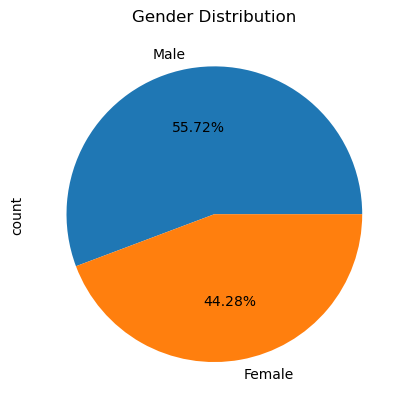

In [153]:
depression["Gender"].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("Gender Distribution")
plt.show()

#### Analysis
- Gender data is balanced.
- Change categorical feature to numerical feataure
#### Data clean
- N/A
#### Feature Engineer
- Binary encoding

In [154]:
depression["Gender"] = depression["Gender"].astype('category').cat.codes
depression.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,0,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,1,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,0,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,0,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [155]:
depression["Gender"].value_counts()

Gender
1    15546
0    12352
Name: count, dtype: int64

In [156]:
features.append("Gender")

### Column: Age
- Numerical feature

In [157]:
depression.Age.value_counts()

Age
24.0    2258
20.0    2236
28.0    2133
29.0    1949
33.0    1893
25.0    1784
21.0    1726
23.0    1645
18.0    1587
19.0    1560
34.0    1468
27.0    1462
31.0    1427
32.0    1261
22.0    1160
26.0    1155
30.0    1145
35.0      10
38.0       8
36.0       7
42.0       4
48.0       3
39.0       3
43.0       2
46.0       2
37.0       2
49.0       1
51.0       1
44.0       1
59.0       1
54.0       1
58.0       1
56.0       1
41.0       1
Name: count, dtype: int64

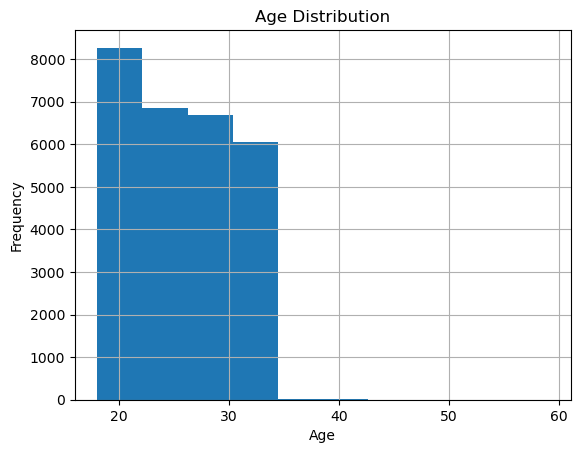

In [158]:
depression.Age.hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [159]:
depression.Age.describe()

count    27898.000000
mean        25.822174
std          4.905651
min         18.000000
25%         21.000000
50%         25.000000
75%         30.000000
max         59.000000
Name: Age, dtype: float64

#### Analyze
- Most of the Age values fall between 18 and 34 (very high frequencies).
- There are a few outliers in the 35–56 range with very low counts (under 10).
- The distribution is right-skewed — many younger users, few older.

#### Clean
- N/A

#### Feature Engineering
- Normalization

In [160]:
print(depression.shape)
scaler = MinMaxScaler()
depression['Age_minmax'] = scaler.fit_transform(depression[['Age']])
print(depression.shape)
depression.head()

(27898, 17)
(27898, 18)


,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age_minmax
0,1,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,0.365854
1,0,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,0.146341
2,1,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,0.317073
3,0,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,0.243902
4,0,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,0.170732


In [161]:
features.append('Age_minmax')

### Column: City
- Categorical features

In [162]:
depression.City.value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1339
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1065
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               684
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Kibara                   1
Nandini                  1
Nalini                 

#### Analysis
- The folloiwng names looks like not cities. 
    - "M.Com", "ME", "M.Tech", "Less than 5 Kalyan", "3.0", "Less Delhi"

#### Clean
- drop low-count noise

#### Feature engineering
- One-Hot Encoding
- Label Encoding

In [163]:
# Drop garbage entries (frequency <= 2)
print(depression.shape)
valid_cities = depression.City.value_counts()[depression['City'].value_counts() > 10].index
depression = depression[depression.City.isin(valid_cities)]
print(depression.shape)
depression.head()


(27898, 18)
(27872, 18)


,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age_minmax
0,1,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,0.365854
1,0,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0,0.146341
2,1,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0,0.317073
3,0,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1,0.243902
4,0,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0,0.170732


In [164]:
# One-hot Encoding
print(depression.shape)
df = pd.get_dummies(depression, columns=['City'], prefix='City')
print(df.shape)
df.head()


(27872, 18)
(27872, 47)


,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,...,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,1,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,...,False,False,False,False,False,False,False,False,False,True
1,0,24.0,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,...,False,False,False,False,False,False,False,False,False,False
2,1,31.0,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,...,False,False,False,True,False,False,False,False,False,False
3,0,28.0,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,...,False,False,False,False,False,False,False,True,False,False
4,0,25.0,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,...,False,False,False,False,False,False,False,False,False,False


In [167]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['City_encoded'] = le.fit_transform(depression['City'])
df.head()

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,...,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,City_encoded
0,1,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,...,False,False,False,False,False,False,False,False,True,29
1,0,24.0,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,...,False,False,False,False,False,False,False,False,False,2
2,1,31.0,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,...,False,False,True,False,False,False,False,False,False,23
3,0,28.0,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,...,False,False,False,False,False,False,True,False,False,27
4,0,25.0,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,...,False,False,False,False,False,False,False,False,False,10


In [168]:
# Add column city back
df['City'] = depression['City']
df.head()

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,...,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,City_encoded,City
0,1,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,...,False,False,False,False,False,False,False,True,29,Visakhapatnam
1,0,24.0,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,...,False,False,False,False,False,False,False,False,2,Bangalore
2,1,31.0,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,...,False,True,False,False,False,False,False,False,23,Srinagar
3,0,28.0,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,...,False,False,False,False,False,True,False,False,27,Varanasi
4,0,25.0,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,...,False,False,False,False,False,False,False,False,10,Jaipur


In [169]:
depression = df
city_one_hot_columns = ['City_Agra', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhopal',
       'City_Chennai', 'City_Delhi', 'City_Faridabad', 'City_Ghaziabad',
       'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kalyan',
       'City_Kanpur', 'City_Kolkata', 'City_Lucknow', 'City_Ludhiana',
       'City_Meerut', 'City_Mumbai', 'City_Nagpur', 'City_Nashik',
       'City_Patna', 'City_Pune', 'City_Rajkot', 'City_Srinagar', 'City_Surat',
       'City_Thane', 'City_Vadodara', 'City_Varanasi', 'City_Vasai-Virar',
       'City_Visakhapatnam',
       'City_encoded']
features.extend(city_one_hot_columns)


### Column: Profession
- Categorical feature

In [170]:
depression.Profession.value_counts()

Profession
Student                   27841
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

#### Analysis
- Dominated by "Sutdent"
- All other professions are extremely rare (<= 8 Sample)
#### Feature Engineering
- Binary Flag: Is student or Not
    - Helps capture dominant class
    - Avoids model overfitting to noise from rare classes

In [171]:
print(depression.shape)
depression['is_student'] = (depression.Profession == 'Student').astype(int)
print(depression.shape)
depression.head()

(27872, 49)
(27872, 50)


,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,...,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,City_encoded,City,is_student
0,1,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,...,False,False,False,False,False,False,True,29,Visakhapatnam,1
1,0,24.0,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,...,False,False,False,False,False,False,False,2,Bangalore,1
2,1,31.0,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,...,True,False,False,False,False,False,False,23,Srinagar,1
3,0,28.0,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,...,False,False,False,False,True,False,False,27,Varanasi,1
4,0,25.0,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,...,False,False,False,False,False,False,False,10,Jaipur,1


In [172]:
features.append('is_student')

### Column: Academic Pressure
- Numerical feature

In [173]:
depression["Academic Pressure"].value_counts()

Academic Pressure
3.0    7453
5.0    6293
4.0    5151
1.0    4796
2.0    4170
0.0       9
Name: count, dtype: int64

#### Analysis
- Mostly distributed between 1 and 5
- Value 0 is extremely rare (only 9 entries)
    - Could be noise, misentered, or missing

#### Clean
- Remove 0 values

#### Feature Engineering
- Use as-is

In [174]:
print(depression.shape)
depression = depression[depression["Academic Pressure"] != 0.0]
print(depression.shape)
depression.head()

(27872, 50)
(27863, 50)


,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,...,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,City_encoded,City,is_student
0,1,33.0,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,...,False,False,False,False,False,False,True,29,Visakhapatnam,1
1,0,24.0,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,...,False,False,False,False,False,False,False,2,Bangalore,1
2,1,31.0,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,...,True,False,False,False,False,False,False,23,Srinagar,1
3,0,28.0,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,...,False,False,False,False,True,False,False,27,Varanasi,1
4,0,25.0,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,...,False,False,False,False,False,False,False,10,Jaipur,1


In [175]:
features.append("Academic Pressure")

### Column: Work Pressure
- Numerical feature

In [176]:
depression["Work Pressure"].value_counts()

Work Pressure
0.0    27863
Name: count, dtype: int64

#### Observation
- This column contains only a single value (0.0)
- This feature has zero variance
- This feature carries on useful information for classification
- Models will ignore it during training
#### Proposal
- drop this feature

In [177]:
print(depression.shape)
depression = depression.drop(columns=['Work Pressure'])
print(depression.shape)
depression.head()

(27863, 50)
(27863, 49)


,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,...,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,City_encoded,City,is_student
0,1,33.0,Student,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,...,False,False,False,False,False,False,True,29,Visakhapatnam,1
1,0,24.0,Student,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,...,False,False,False,False,False,False,False,2,Bangalore,1
2,1,31.0,Student,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,...,True,False,False,False,False,False,False,23,Srinagar,1
3,0,28.0,Student,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,...,False,False,False,False,True,False,False,27,Varanasi,1
4,0,25.0,Student,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,...,False,False,False,False,False,False,False,10,Jaipur,1


### Column: CGPA
- Grade Point Average or other academic scores.
- Numerical feature

In [178]:
depression["CGPA"].value_counts()

CGPA
8.0400    821
9.9600    425
5.7400    410
8.9500    370
9.2100    342
         ... 
6.6400      1
7.0625      1
6.9800      1
6.4400      1
6.0900      1
Name: count, Length: 332, dtype: int64

<Axes: >

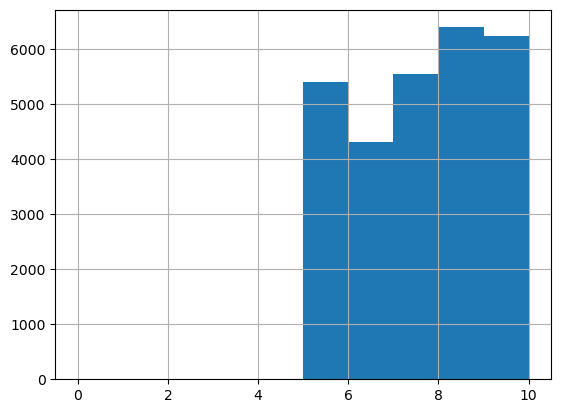

In [180]:
depression["CGPA"].hist()

In [181]:
depression["CGPA"].describe()

count    27863.000000
mean         7.657706
std          1.466743
min          0.000000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

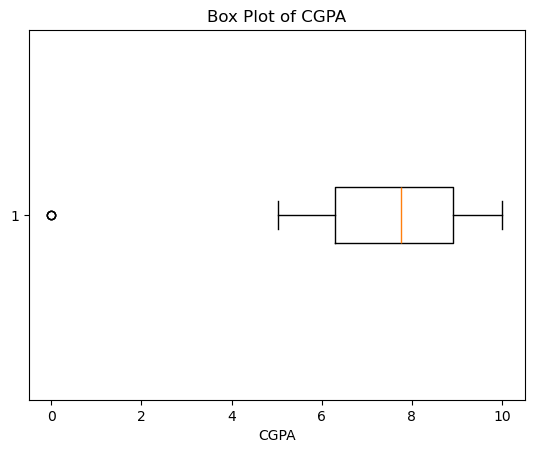

In [182]:
plt.boxplot(depression["CGPA"], vert=False)
plt.title('Box Plot of CGPA')
plt.xlabel('CGPA')
plt.show()

#### Column: Observation
- Distribution is skewed toward high CGPA(6-10)
- There are some extreme outliers at 0.0, which are likely invalid

#### Clean
- Remove outlier data

#### Feature Engineering
- Standardization

In [183]:
print(depression.shape)
depression = depression[depression["CGPA"] != 0.0]
print(depression.shape)
depression.head()

(27863, 49)
(27860, 49)


,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,...,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,City_encoded,City,is_student
0,1,33.0,Student,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,...,False,False,False,False,False,False,True,29,Visakhapatnam,1
1,0,24.0,Student,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,...,False,False,False,False,False,False,False,2,Bangalore,1
2,1,31.0,Student,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,...,True,False,False,False,False,False,False,23,Srinagar,1
3,0,28.0,Student,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,...,False,False,False,False,True,False,False,27,Varanasi,1
4,0,25.0,Student,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,...,False,False,False,False,False,False,False,10,Jaipur,1


In [185]:
# Standardization
print(depression.shape)
depression['CGPA_scaled'] = StandardScaler().fit_transform(depression[['CGPA']])
print(depression.shape)
depression.head()

(27860, 49)
(27860, 50)


,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,...,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,City_encoded,City,is_student,CGPA_scaled
0,1,33.0,Student,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,...,False,False,False,False,False,True,29,Visakhapatnam,1,0.895420
1,0,24.0,Student,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,...,False,False,False,False,False,False,2,Bangalore,1,-1.200656
2,1,31.0,Student,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,...,False,False,False,False,False,False,23,Srinagar,1,-0.429136
3,0,28.0,Student,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,...,False,False,False,True,False,False,27,Varanasi,1,-1.412312
4,0,25.0,Student,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,...,False,False,False,False,False,False,10,Jaipur,1,0.321901


In [186]:
features.append('CGPA_scaled')

### Column: Study Satisfaction
- Numerical Feature

In [187]:
depression["Study Satisfaction"].value_counts()

Study Satisfaction
4.0    6354
2.0    5830
3.0    5816
1.0    5440
5.0    4418
0.0       2
Name: count, dtype: int64

<Axes: >

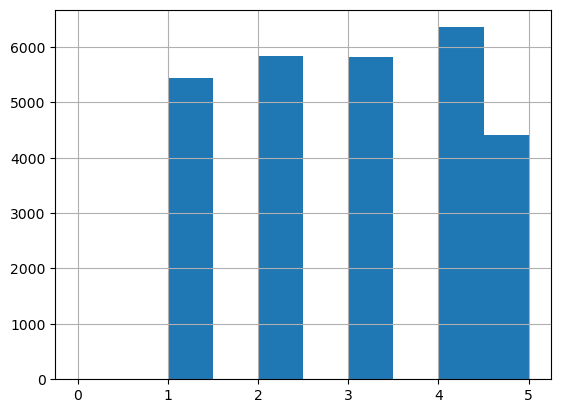

In [188]:
depression["Study Satisfaction"].hist()

#### Analysis
- Values range from 1.0 to 5.0, resembling a Likert scale (e.g., 1 = very dissatisfied, 5 = very satisfied).
- 0.0 is highly suspicious — likely a data entry error or placeholder for missing data.
- Distribution is relatively balanced, which is good for modeling.

#### Clean
- Clean the 0.0 values

#### Feature Engineering
- Use as-is

In [78]:
print(depression.shape)
depression = depression[depression["Study Satisfaction"] != 0.0]
print(depression.shape)
depression.head()

(27863, 22)
(27861, 22)


,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,...,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,age_group_<20,age_group_20-25,age_group_25-30,age_group_30-35,age_group_35+,is_student
0,1,33.0,Visakhapatnam,Student,5.0,8.97,2.0,0.0,5-6 hours,Healthy,...,3.0,1.0,No,1,False,False,False,True,False,1
1,0,24.0,Bangalore,Student,2.0,5.90,5.0,0.0,5-6 hours,Moderate,...,3.0,2.0,Yes,0,False,True,False,False,False,1
2,1,31.0,Srinagar,Student,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,...,9.0,1.0,Yes,0,False,False,False,True,False,1
3,0,28.0,Varanasi,Student,3.0,5.59,2.0,0.0,7-8 hours,Moderate,...,4.0,5.0,Yes,1,False,False,True,False,False,1
4,0,25.0,Jaipur,Student,4.0,8.13,3.0,0.0,5-6 hours,Moderate,...,1.0,1.0,No,0,False,False,True,False,False,1


In [189]:
features.append("Study Satisfaction")

### Column: Job Satisfaction
- Numerical feature

In [79]:
depression["Job Satisfaction"].value_counts()

Job Satisfaction
0.0    27859
3.0        1
2.0        1
Name: count, dtype: int64

#### Analysis
- The column is almost entirely 0.0
- Only 2 non-zero entries out of nearly 28,000 rows.
- This means the column has almost no variance, and is dominated by a single class.
- This is column is not useful for classification

#### Clean
- Drop the column

In [190]:
print(depression.shape)
depression = depression.drop(columns=["Job Satisfaction"])
print(depression.shape)
depression.head()

(27860, 50)
(27860, 49)


,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,City_encoded,City,is_student,CGPA_scaled
0,1,33.0,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,...,False,False,False,False,False,True,29,Visakhapatnam,1,0.895420
1,0,24.0,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,...,False,False,False,False,False,False,2,Bangalore,1,-1.200656
2,1,31.0,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,...,False,False,False,False,False,False,23,Srinagar,1,-0.429136
3,0,28.0,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,...,False,False,False,True,False,False,27,Varanasi,1,-1.412312
4,0,25.0,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,...,False,False,False,False,False,False,10,Jaipur,1,0.321901


### Column: Sleep Duration
- Categorical feature

In [192]:
depression["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8296
7-8 hours            7334
5-6 hours            6173
More than 8 hours    6039
Others                 18
Name: count, dtype: int64

<Axes: >

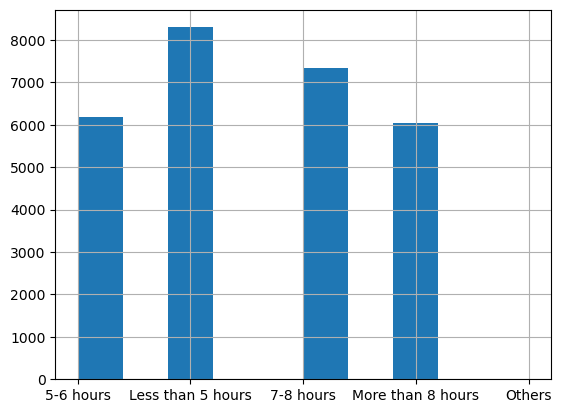

In [193]:
depression["Sleep Duration"].hist()



#### Analysis
- Data is reasonably balanced among meaningful sleep categories.
- The "Others" group is extremely rare

#### Clean
- Remove others

#### Feature Engineering
- Ordinal Encoding
    - Assign numerical values thaqt repect duration order

In [194]:
# Remove "Others"
print(depression.shape)
df = depression[depression["Sleep Duration"] != 'Others']
print(df.shape)
df.head()

(27860, 49)
(27842, 49)


,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,City_encoded,City,is_student,CGPA_scaled
0,1,33.0,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,...,False,False,False,False,False,True,29,Visakhapatnam,1,0.895420
1,0,24.0,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,...,False,False,False,False,False,False,2,Bangalore,1,-1.200656
2,1,31.0,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,...,False,False,False,False,False,False,23,Srinagar,1,-0.429136
3,0,28.0,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,...,False,False,False,True,False,False,27,Varanasi,1,-1.412312
4,0,25.0,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,...,False,False,False,False,False,False,10,Jaipur,1,0.321901


In [195]:
# Ordinal Encoding
sleep_map = {
    'Less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'More than 8 hours': 4
}
print(df.shape)
df['Sleep_Ordinal'] = df['Sleep Duration'].map(sleep_map)
print(df.shape)
df.head()

(27842, 49)
(27842, 50)


/var/folders/59/65rb1w3s5hggx0w1_zlf51rc0000gn/T/ipykernel_86367/4241083474.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sleep_Ordinal'] = df['Sleep Duration'].map(sleep_map)


,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,City_encoded,City,is_student,CGPA_scaled,Sleep_Ordinal
0,1,33.0,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,...,False,False,False,False,True,29,Visakhapatnam,1,0.895420,2
1,0,24.0,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,...,False,False,False,False,False,2,Bangalore,1,-1.200656,2
2,1,31.0,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,...,False,False,False,False,False,23,Srinagar,1,-0.429136,1
3,0,28.0,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,...,False,False,True,False,False,27,Varanasi,1,-1.412312,3
4,0,25.0,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,...,False,False,False,False,False,10,Jaipur,1,0.321901,2


In [196]:
depression = df
features.append('Sleep_Ordinal')

### Column: Dietary Habits
- Categorical Feature

In [197]:
depression["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10291
Moderate      9902
Healthy       7637
Others          12
Name: count, dtype: int64

#### Analysis
- The categories "Healthy", "Moderate", and "Unhealthy" are well-structured and ordered.
- "Others" is negligible (12 values), and likely invalid, ambiguous, or missing.
- This is an ordinal categorical feature — higher values imply better habits.

#### Clean
- Remove "Others"

#### Feature Engineering
- Ordinal Encoding

In [198]:
# Remove "Others"
print(depression.shape)
df = depression[depression["Dietary Habits"] != 'Others']
print(df.shape)
df.head()

(27842, 50)
(27830, 50)


,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,City_encoded,City,is_student,CGPA_scaled,Sleep_Ordinal
0,1,33.0,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,...,False,False,False,False,True,29,Visakhapatnam,1,0.895420,2
1,0,24.0,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,...,False,False,False,False,False,2,Bangalore,1,-1.200656,2
2,1,31.0,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,...,False,False,False,False,False,23,Srinagar,1,-0.429136,1
3,0,28.0,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,...,False,False,True,False,False,27,Varanasi,1,-1.412312,3
4,0,25.0,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,...,False,False,False,False,False,10,Jaipur,1,0.321901,2


In [199]:
# Ordinal Encoding
diet_map = {
    'Unhealthy': 1,
    'Moderate': 2,
    'Healthy': 3
}
df['Dietary_Ordinal'] = df['Dietary Habits'].map(diet_map)

/var/folders/59/65rb1w3s5hggx0w1_zlf51rc0000gn/T/ipykernel_86367/3439382896.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dietary_Ordinal'] = df['Dietary Habits'].map(diet_map)


In [200]:
print(df.shape)
df.head()

(27830, 51)


,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,City_encoded,City,is_student,CGPA_scaled,Sleep_Ordinal,Dietary_Ordinal
0,1,33.0,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,...,False,False,False,True,29,Visakhapatnam,1,0.895420,2,3
1,0,24.0,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,...,False,False,False,False,2,Bangalore,1,-1.200656,2,2
2,1,31.0,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,...,False,False,False,False,23,Srinagar,1,-0.429136,1,3
3,0,28.0,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,...,False,True,False,False,27,Varanasi,1,-1.412312,3,2
4,0,25.0,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,...,False,False,False,False,10,Jaipur,1,0.321901,2,2


In [201]:
depression = df
features.append('Dietary_Ordinal')

### Column: Degree
- Categorical Feature

In [202]:
depression["Degree"].value_counts()

Degree
Class 12    6065
B.Ed        1861
B.Com       1502
B.Arch      1476
BCA         1429
MSc         1187
B.Tech      1151
MCA         1041
M.Tech      1019
BHM          924
BSc          886
M.Ed         816
B.Pharm      809
M.Com        734
BBA          695
MBBS         694
LLB          669
BE           609
BA           595
M.Pharm      581
MD           571
MBA          560
MA           544
PhD          520
LLM          481
MHM          191
ME           185
Others        35
Name: count, dtype: int64

#### Analysis
- This column a lot different degreees across undergraduate, postgraduate, professional, and school-level

#### Clean
- N/A

#### Feature Engineering
- Group and ordinal encoding

In [203]:
# Group
def map_degree(degree):
    if degree in ['Class 12']:
        return 'HighSchool'
    elif degree in ['B.Com', 'B.Arch', 'BCA', 'B.Tech', 'BHM', 'BSc', 'BBA', 'B.Pharm', 'BA', 'BE', 'LLB']:
        return 'Bachelors'
    elif degree in ['M.Tech', 'MCA', 'MSc', 'M.Ed', 'M.Com', 'MA', 'MBA', 'ME', 'M.Pharm', 'MHM']:
        return 'Masters'
    elif degree in ['PhD', 'MD', 'MBBS', 'LLM']:
        return 'Doctoral/Professional'
    elif degree == 'B.Ed':
        return 'Teaching UG'
    else:
        return 'Other'

print(depression.shape)
depression["Degree_group"] = depression["Degree"].apply(map_degree)
print(depression.shape)
depression.head()

(27830, 51)
(27830, 52)


,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,City_encoded,City,is_student,CGPA_scaled,Sleep_Ordinal,Dietary_Ordinal,Degree_group
0,1,33.0,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,...,False,False,True,29,Visakhapatnam,1,0.895420,2,3,Bachelors
1,0,24.0,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,...,False,False,False,2,Bangalore,1,-1.200656,2,2,Bachelors
2,1,31.0,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,...,False,False,False,23,Srinagar,1,-0.429136,1,3,Bachelors
3,0,28.0,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,...,True,False,False,27,Varanasi,1,-1.412312,3,2,Bachelors
4,0,25.0,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,...,False,False,False,10,Jaipur,1,0.321901,2,2,Masters


In [204]:
# Ordinary Encoding
degree_level_map = {
    'Other': 0,
    'HighSchool': 1,
    'Bachelors': 2,
    'Masters': 3,
    'Doctoral/Professional': 4,
    'Teaching UG': 2
}
print(depression.shape)
depression['Degree_Ordinal'] = df['Degree_group'].map(degree_level_map)
print(depression.shape)
depression.head()

(27830, 52)
(27830, 53)


,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,City_Vasai-Virar,City_Visakhapatnam,City_encoded,City,is_student,CGPA_scaled,Sleep_Ordinal,Dietary_Ordinal,Degree_group,Degree_Ordinal
0,1,33.0,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,...,False,True,29,Visakhapatnam,1,0.895420,2,3,Bachelors,2
1,0,24.0,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,...,False,False,2,Bangalore,1,-1.200656,2,2,Bachelors,2
2,1,31.0,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,...,False,False,23,Srinagar,1,-0.429136,1,3,Bachelors,2
3,0,28.0,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,...,False,False,27,Varanasi,1,-1.412312,3,2,Bachelors,2
4,0,25.0,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,...,False,False,10,Jaipur,1,0.321901,2,2,Masters,3


In [205]:
features.append('Degree_Ordinal')

#### Column: Have you ever had suicidal thoughts
- Categorical feature

In [206]:
depression["Have you ever had suicidal thoughts ?"].value_counts()

Have you ever had suicidal thoughts ?
Yes    17611
No     10219
Name: count, dtype: int64

<Axes: ylabel='count'>

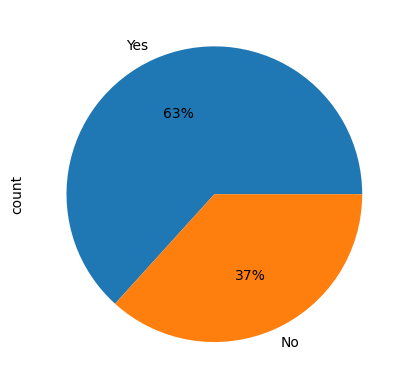

In [207]:
depression["Have you ever had suicidal thoughts ?"].value_counts().plot.pie(autopct="%1.0f%%")

#### Analysis
- Binary categorical variable (Yes / No)
- Distribution is moderately imbalanced (around 63% Yes, 37% No)

#### Clean
- N/A

#### Feature Engineering
- Binary encoding


In [208]:
print(depression.shape)
depression["has_suicidal_thoughts"] = depression["Have you ever had suicidal thoughts ?"].map({'No':0, 'Yes':1})
print(depression.shape)
depression.head()

(27830, 53)
(27830, 54)


,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,City_Visakhapatnam,City_encoded,City,is_student,CGPA_scaled,Sleep_Ordinal,Dietary_Ordinal,Degree_group,Degree_Ordinal,has_suicidal_thoughts
0,1,33.0,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,...,True,29,Visakhapatnam,1,0.895420,2,3,Bachelors,2,1
1,0,24.0,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,...,False,2,Bangalore,1,-1.200656,2,2,Bachelors,2,0
2,1,31.0,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,...,False,23,Srinagar,1,-0.429136,1,3,Bachelors,2,0
3,0,28.0,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,...,False,27,Varanasi,1,-1.412312,3,2,Bachelors,2,1
4,0,25.0,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,...,False,10,Jaipur,1,0.321901,2,2,Masters,3,1


In [209]:
features.append('has_suicidal_thoughts')

#### Column: Work/Study Hours
- Numerical

In [210]:
depression["Work/Study Hours"].value_counts()

Work/Study Hours
10.0    4226
12.0    3162
11.0    2887
8.0     2504
6.0     2241
9.0     2022
7.0     1995
0.0     1694
4.0     1608
2.0     1583
3.0     1466
5.0     1295
1.0     1147
Name: count, dtype: int64

<Axes: >

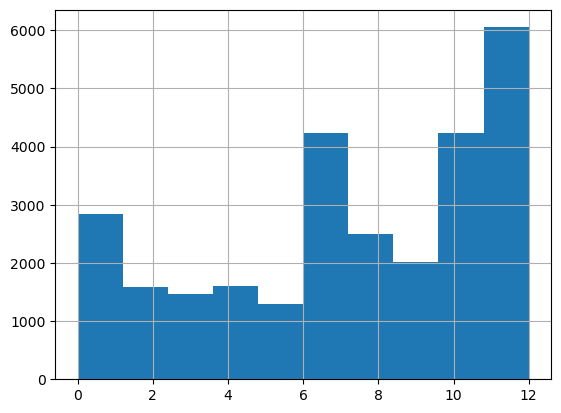

In [211]:
depression["Work/Study Hours"].hist()

#### Feature Engineering
- Use as-is

In [212]:
features.append("Work/Study Hours")

### Column: Financial Stress

In [213]:
depression["Financial Stress"].value_counts()

Financial Stress
5.0    6697
4.0    5768
3.0    5212
1.0    5105
2.0    5048
Name: count, dtype: int64

<Axes: >

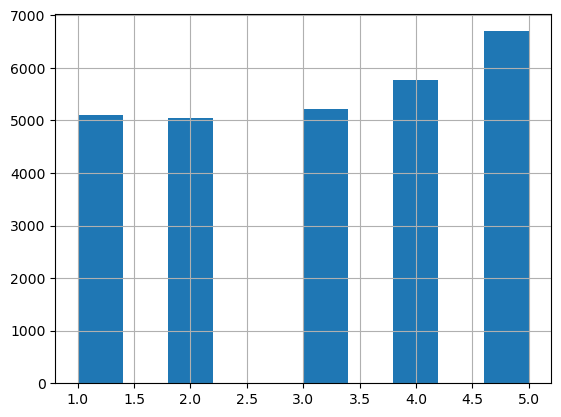

In [214]:
depression["Financial Stress"].hist()

#### Analysis
- Values range from 1.0 to 5.0, likely on a Likert scale (1 = low stress, 5 = very high stress).
- Distribution is fairly balanced, with a slight skew toward higher stress levels (4.0, 5.0).

#### Feature Engineerign
- Use as original numerica feature

In [215]:
features.append("Financial Stress")

### Column: Family History of Mental Illness

In [216]:
depression["Family History of Mental Illness"].value_counts()


Family History of Mental Illness
No     14355
Yes    13475
Name: count, dtype: int64

<Axes: ylabel='count'>

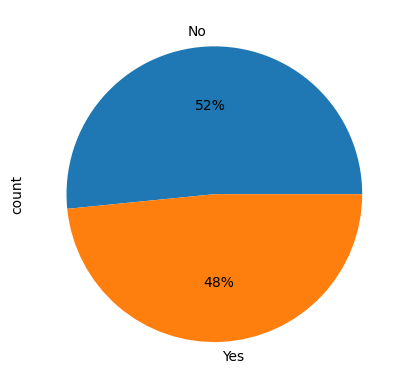

In [108]:
depression["Family History of Mental Illness"].value_counts().plot.pie(autopct="%1.0f%%")

#### Analysis
- The responses are relatively evenly split, with slightly more people reporting no family history.
- 48% have a family history, 52% do not.

#### Feature Engineering
- Binary encoding


In [217]:
print(depression.shape)
depression["has_family_history"] = depression["Family History of Mental Illness"].map({'No':0, 'Yes':1})
print(depression.shape)
depression.head()

(27830, 54)
(27830, 55)


,Gender,Age,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,...,City_encoded,City,is_student,CGPA_scaled,Sleep_Ordinal,Dietary_Ordinal,Degree_group,Degree_Ordinal,has_suicidal_thoughts,has_family_history
0,1,33.0,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,...,29,Visakhapatnam,1,0.895420,2,3,Bachelors,2,1,0
1,0,24.0,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,...,2,Bangalore,1,-1.200656,2,2,Bachelors,2,0,1
2,1,31.0,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,...,23,Srinagar,1,-0.429136,1,3,Bachelors,2,0,1
3,0,28.0,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,...,27,Varanasi,1,-1.412312,3,2,Bachelors,2,1,1
4,0,25.0,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,...,10,Jaipur,1,0.321901,2,2,Masters,3,1,0


In [219]:
features.append("has_family_history")

### Final Data

In [229]:
for i in range(0, len(features), 5):
    print(features[i: i+5])

['Gender', 'Age_minmax', 'City_Agra', 'City_Ahmedabad', 'City_Bangalore']
['City_Bhopal', 'City_Chennai', 'City_Delhi', 'City_Faridabad', 'City_Ghaziabad']
['City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kalyan', 'City_Kanpur']
['City_Kolkata', 'City_Lucknow', 'City_Ludhiana', 'City_Meerut', 'City_Mumbai']
['City_Nagpur', 'City_Nashik', 'City_Patna', 'City_Pune', 'City_Rajkot']
['City_Srinagar', 'City_Surat', 'City_Thane', 'City_Vadodara', 'City_Varanasi']
['City_Vasai-Virar', 'City_Visakhapatnam', 'City_encoded', 'is_student', 'Academic Pressure']
['CGPA_scaled', 'Study Satisfaction', 'Sleep_Ordinal', 'Dietary_Ordinal', 'Degree_Ordinal']
['has_suicidal_thoughts', 'Work/Study Hours', 'Financial Stress', 'has_family_history']


In [243]:
features.append('Depression')
final_data = depression[features]
print(final_data.shape)
final_data.head()

(27830, 45)


,Gender,Age_minmax,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Chennai,City_Delhi,City_Faridabad,City_Ghaziabad,...,CGPA_scaled,Study Satisfaction,Sleep_Ordinal,Dietary_Ordinal,Degree_Ordinal,has_suicidal_thoughts,Work/Study Hours,Financial Stress,has_family_history,Depression
0,1,0.365854,False,False,False,False,False,False,False,False,...,0.895420,2.0,2,3,2,1,3.0,1.0,0,1
1,0,0.146341,False,False,True,False,False,False,False,False,...,-1.200656,5.0,2,2,2,0,3.0,2.0,1,0
2,1,0.317073,False,False,False,False,False,False,False,False,...,-0.429136,5.0,1,3,2,0,9.0,1.0,1,0
3,0,0.243902,False,False,False,False,False,False,False,False,...,-1.412312,2.0,3,2,2,1,4.0,5.0,1,1
4,0,0.170732,False,False,False,False,False,False,False,False,...,0.321901,3.0,2,2,3,1,1.0,1.0,0,0


## Correlation analysis

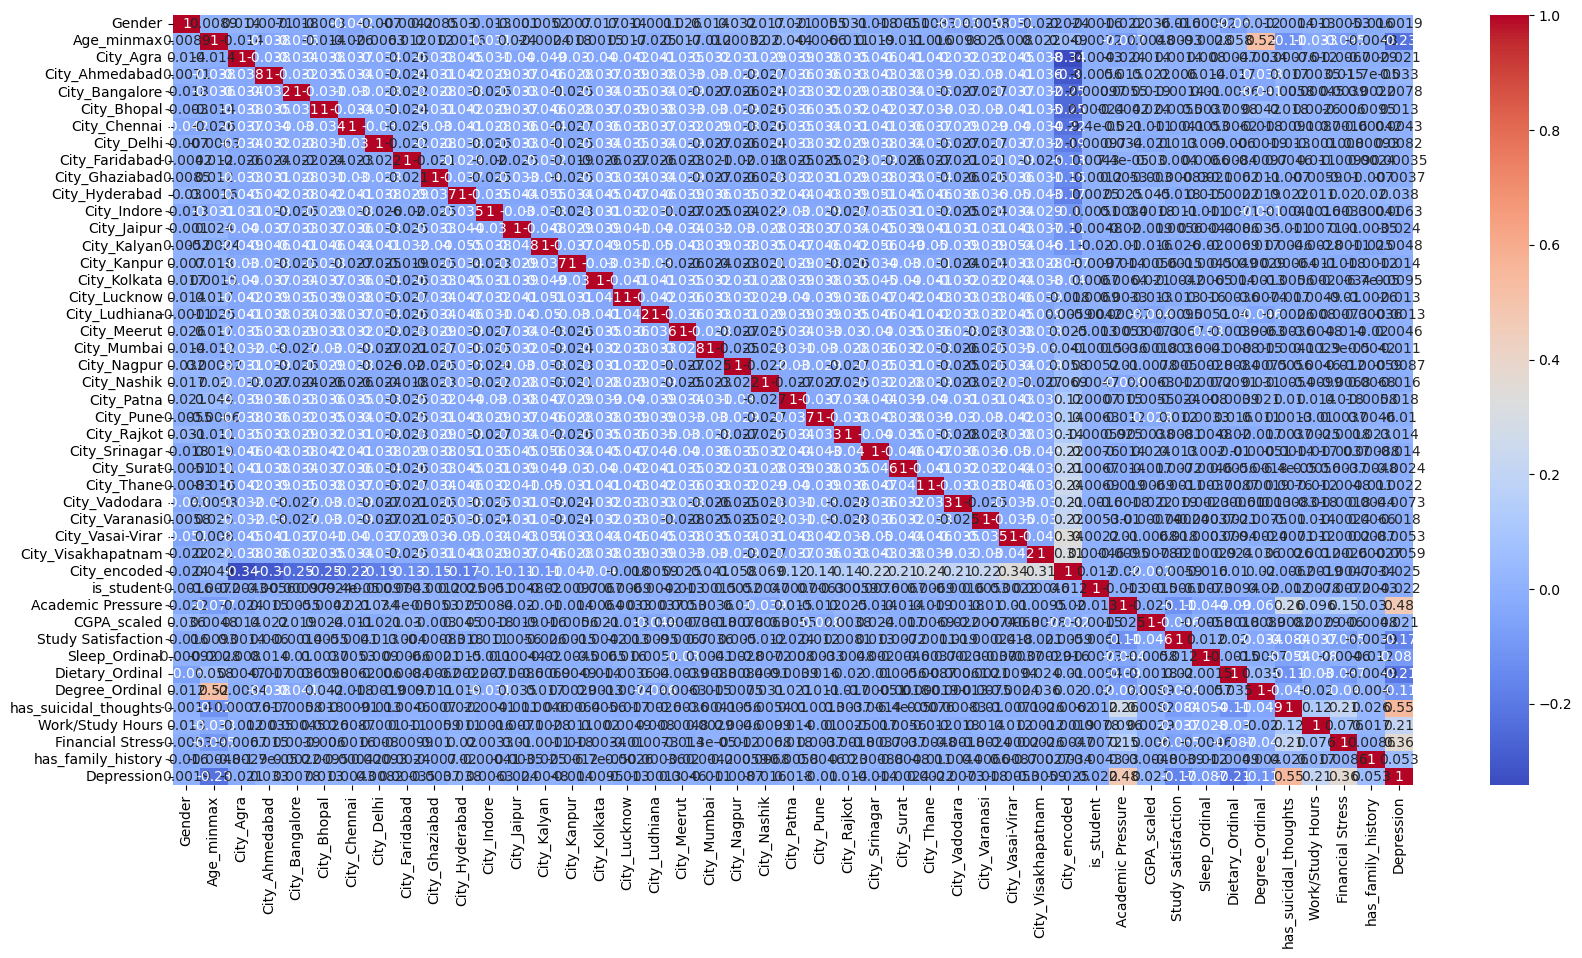

In [244]:
plt.figure(figsize=(20, 10))
sns.heatmap(final_data.corr(), annot=True, cmap='coolwarm')
plt.show()

## Model Training
- Neural Network
- Logistic Regression
- SVC
- Decision Tree
- Naïve Bayes

In [247]:
model_evaluates = []

### Logistic Regression

In [ ]:
# Choose Features
features = features[:-1]

X = final_data[features]
y = final_data['Depression']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regession Model
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

# Evaluate Model
y_pred = model_LR.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8181818181818182
Confusion Matrix:
 [[1743  580]
 [ 432 2811]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.78      2323
           1       0.83      0.87      0.85      3243

    accuracy                           0.82      5566
   macro avg       0.82      0.81      0.81      5566
weighted avg       0.82      0.82      0.82      5566



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [261]:
evaluate = {}
evaluate["Model Name"] = "model_LR"
evaluate["Model Method"] = "Logistic Regression"
evaluate["Accuracy"] = 0.818
evaluate["Precision(class 1)"] = 0.83
evaluate["Recall(class 1)"] = 0.87
evaluate["f1-score(class 1)"] = 0.85
model_evaluates.append(evaluate)


# Neural Network

In [254]:
# Define and train the Neral Network
Model_NN = MLPClassifier(
    hidden_layer_sizes=(64, 32),     # Two hidden layers with 64 and 32 neurons
    activation='relu',               # Activation function
    solver='adam',                   # Optimizer
    max_iter=200,                    # Increase if convergence warnings appear
    random_state=42
)
Model_NN.fit(X_train, y_train)

y_pred = Model_NN.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8003952569169961
Confusion Matrix:
 [[1655  668]
 [ 443 2800]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      2323
           1       0.81      0.86      0.83      3243

    accuracy                           0.80      5566
   macro avg       0.80      0.79      0.79      5566
weighted avg       0.80      0.80      0.80      5566



/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [262]:
evaluate = {}
evaluate["Model Name"] = "model_NN"
evaluate["Model Method"] = "Neural Network"
evaluate["Accuracy"] = 0.80
evaluate["Precision(class 1)"] = 0.81
evaluate["Recall(class 1)"] = 0.86
evaluate["f1-score(class 1)"] = 0.83
model_evaluates.append(evaluate)

### SVC

In [256]:

svc_model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svc_model_rbf.fit(X_train, y_train)


y_pred = svc_model_rbf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.808300395256917
Confusion Matrix:
 [[1680  643]
 [ 424 2819]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76      2323
           1       0.81      0.87      0.84      3243

    accuracy                           0.81      5566
   macro avg       0.81      0.80      0.80      5566
weighted avg       0.81      0.81      0.81      5566



In [269]:
svc_model_linear = SVC(kernel='linear', C=1.0, gamma='scale', probability=True, random_state=42)
svc_model_linear.fit(X_train, y_train)


y_pred = svc_model_linear.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8181818181818182
Confusion Matrix:
 [[1717  606]
 [ 406 2837]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77      2323
           1       0.82      0.87      0.85      3243

    accuracy                           0.82      5566
   macro avg       0.82      0.81      0.81      5566
weighted avg       0.82      0.82      0.82      5566



In [258]:
svc_model_poly = SVC(kernel='poly', C=1.0, gamma='scale')
svc_model_poly.fit(X_train, y_train)


y_pred = svc_model_poly.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7833273445921667
Confusion Matrix:
 [[1432  891]
 [ 315 2928]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.62      0.70      2323
           1       0.77      0.90      0.83      3243

    accuracy                           0.78      5566
   macro avg       0.79      0.76      0.77      5566
weighted avg       0.79      0.78      0.78      5566



In [263]:
evaluate = {}
evaluate["Model Name"] = "svc_model_linear"
evaluate["Model Method"] = "SVC linear kernal"
evaluate["Accuracy"] = 0.818
evaluate["Precision(class 1)"] = 0.82
evaluate["Recall(class 1)"] = 0.87
evaluate["f1-score(class 1)"] = 0.85
model_evaluates.append(evaluate)

# Decision Tree

Accuracy: 0.8068630973769314
Confusion Matrix:
 [[1721  602]
 [ 473 2770]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      2323
           1       0.82      0.85      0.84      3243

    accuracy                           0.81      5566
   macro avg       0.80      0.80      0.80      5566
weighted avg       0.81      0.81      0.81      5566



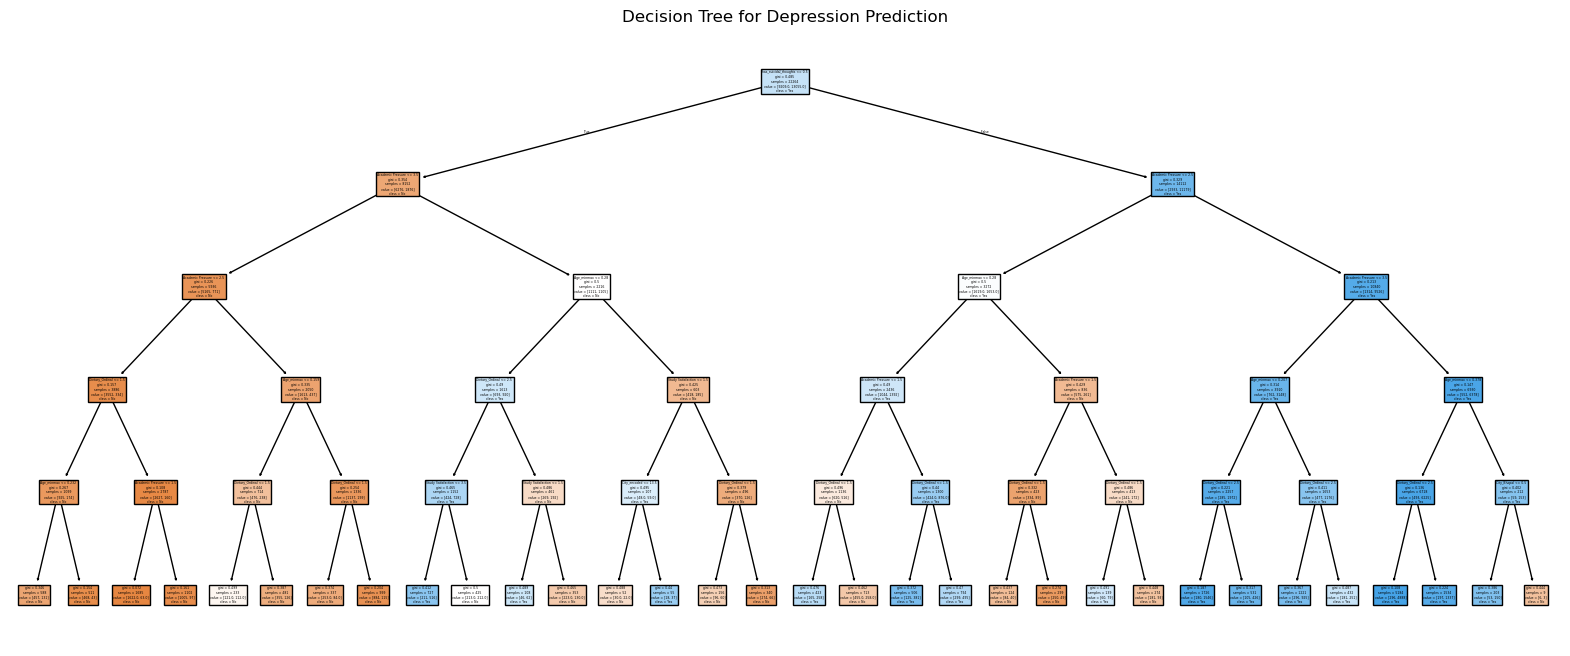

In [260]:
tree = DecisionTreeClassifier(
    criterion='gini',     # or 'entropy'
    max_depth=5,          # limit depth to avoid overfitting
    random_state=42
)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visulize the Tree

plt.figure(figsize=(20, 8))
plot_tree(tree, feature_names=features, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for Depression Prediction")
plt.show()

In [264]:
evaluate = {}
evaluate["Model Name"] = "tree"
evaluate["Model Method"] = "Decision Tree"
evaluate["Accuracy"] = 0.807
evaluate["Precision(class 1)"] = 0.82
evaluate["Recall(class 1)"] = 0.85
evaluate["f1-score(class 1)"] = 0.84
model_evaluates.append(evaluate)

### Model Comparison

In [265]:
model_comparison = pd.DataFrame(model_evaluates)
model_comparison

,Model Name,Model Method,Accuracy,Precision(class 1),Recall(class 1),f1-score(class 1)
0,model_LR,Logistic Regression,0.818,0.83,0.87,0.85
1,model_NN,Neural Network,0.800,0.81,0.86,0.83
2,svc_model_linear,SVC linear kernal,0.818,0.82,0.87,0.85
3,tree,Decision Tree,0.807,0.82,0.85,0.84


#### Logistic Regression model has the slight best performance

### ROC/AUC

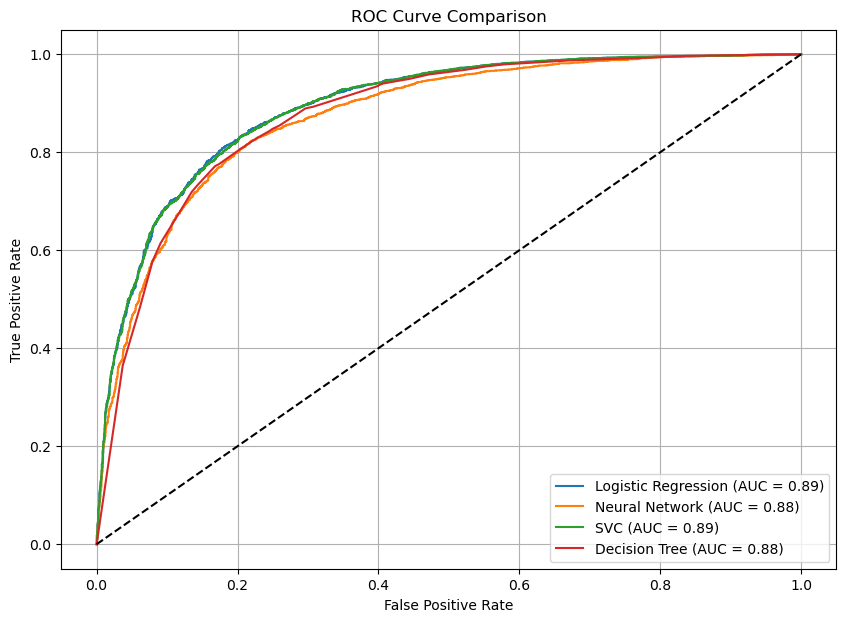

In [274]:
# y_test: true labels

# === Get predicted probabilities for the positive class
y_score1 = model_LR.predict_proba(X_test)[:, 1]
y_score2 = Model_NN.predict_proba(X_test)[:, 1]
y_score3 = svc_model_linear.predict_proba(X_test)[:, 1]
y_score4 = tree.predict_proba(X_test)[:, 1]

# === Compute ROC curve and AUC for each model
fpr1, tpr1, _ = roc_curve(y_test, y_score1)
fpr2, tpr2, _ = roc_curve(y_test, y_score2)
fpr3, tpr3, _ = roc_curve(y_test, y_score3)
fpr4, tpr4, _ = roc_curve(y_test, y_score4)

auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)
auc4 = auc(fpr4, tpr4)

# === Plot all ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr1, tpr1, label=f'Logistic Regression (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'Neural Network (AUC = {auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'SVC (AUC = {auc3:.2f})')
plt.plot(fpr4, tpr4, label=f'Decision Tree (AUC = {auc4:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guess)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### AUC Score Summary
- All models perform very well
    - AUC values above 0.85 indicate strong classification power.
    - All models separate the classes (Depressed vs Not) significantly better than random guessing (AUC = 0.5).
- Best Performers: Logistic Regression & SVC
    - Both reach AUC = 0.89, meaning they strike the best balance between true positives and false positives across all thresholds.
    - These two may be preferred if interpretability (logistic) or margin-based confidence (SVC) matters.
- Neural Network vs Decision Tree
    - Slightly lower AUC (0.88) but still competitive.
    - Neural Networks may capture non-linearities, while Decision Trees are easier to interpret.
    - Slightly steeper initial lift in the curve suggests they catch more positives early, but plateau faster.